# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


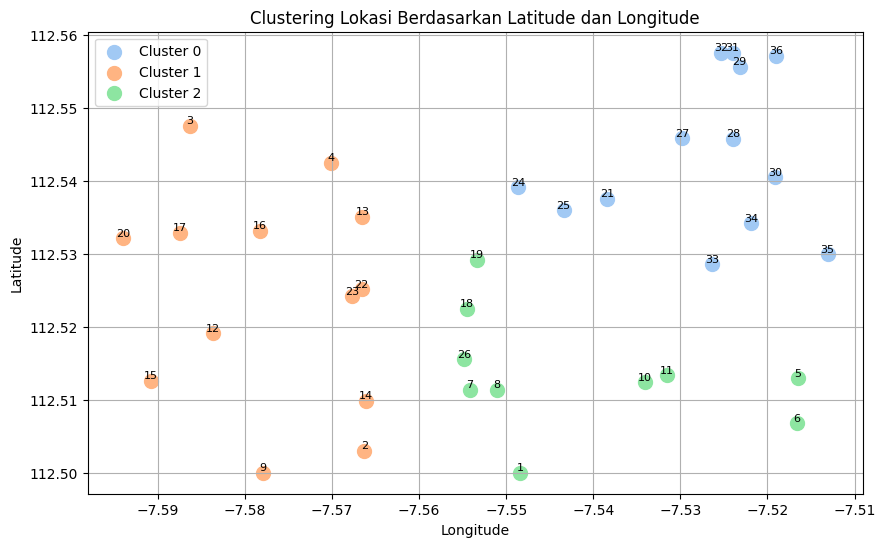

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# import data

df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Kuliah-Soft-Computing/main/DATA%20KL%20-%20Sheet1%20(6).csv")


# Ganti koma dengan titik hanya untuk kolom Latitude dan Longitude, lalu ubah ke tipe data float
df['Latitude'] = df['Latitude'].str.replace(',', '.').astype(float)
df['Longitude'] = df['Longitude'].str.replace(',', '.').astype(float)


df
# Ubah data untuk 'SDN Gedangan 1'
df.loc[df['Tempat Lokasi'] == 'SDN Gedangan 1', 'Latitude'] = -7.5484
df.loc[df['Tempat Lokasi'] == 'SDN Gedangan 1', 'Longitude'] = 112.500



# Lakukan clustering menggunakan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", 3)  # Menggunakan pastel palette dari seaborn
for cluster in range(3):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Latitude'], clustered_data['Longitude'], color=colors[cluster], label=f'Cluster {cluster}', s=100)  # Ukuran lingkaran diperkecil menjadi 100

for i, row in df.iterrows():
    plt.text(row['Latitude'], row['Longitude'], row['ID'], fontsize=8, ha='center', va='bottom')  # Ukuran tulisan diperkecil menjadi 8

plt.title('Clustering Lokasi Berdasarkan Latitude dan Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# Simpan hasil clustering ke dalam file CSV
output_file = "/content/sample_data/clustered_data.csv"
df.to_csv(output_file, index=False)
print(f"Hasil clustering disimpan di: {output_file}")

Hasil clustering disimpan di: /content/sample_data/clustered_data.csv


# Travelling Salesman Problem using Genetic Algorithm

### Importing Libraries

In [107]:
import matplotlib.pyplot as plt
from itertools import permutations, combinations
from random import shuffle
import random
import numpy as np
import statistics
import pandas as pd
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

## Data

In [108]:
df_c = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Kuliah-Soft-Computing/main/clustered_data%20(1).csv")
df_c

,Tempat Lokasi,Latitude,Longitude,ID,Cluster
0,SDN Gedangan 1,-7.5484,112.5000,1,2
1,SDN Gedangan 2,-7.5663,112.5030,2,1
2,SDN Jiyu 1,-7.5863,112.5476,3,1
3,SDN Jiyu 2,-7.5701,112.5425,4,1
4,SDN Kaligoro,-7.5165,112.5130,5,2
5,SDN Karangasem,-7.5166,112.5068,6,2
6,SDN Karangdiyeng 1,-7.5542,112.5114,7,2
7,SDN Karangdiyeng 2,-7.5511,112.5114,8,2
8,SDN Kepuharum,-7.5779,112.5000,9,1
9,SDN Kepuhpandak 1,-7.5341,112.5124,10,2


In [109]:
# Buat dataframe baru dengan data dari cluster 0
df_c0 = df[df['Cluster'] == 0]
# Menambahkan data BBC
bbc = {"Tempat Lokasi": "BBC", "Latitude": -7.548400188420115, "Longitude": 112.52445814153111, "ID": 100, "Cluster": 0}
df_c0 = df_c0._append(bbc, ignore_index=True)
df_c0

,Tempat Lokasi,Latitude,Longitude,ID,Cluster
0,SDN Singowangi,-7.5384,112.537600,21,0
1,SDN Wonodadi 1,-7.5486,112.539200,24,0
2,SDN Wonodadi 2,-7.5434,112.536000,25,0
3,SDN Belahantengah,-7.5298,112.545900,27,0
4,SDN Mojosulur 1,-7.5239,112.545800,28,0
5,SDN Mojosulur 2,-7.5232,112.555700,29,0
6,SDN Menanggal,-7.5191,112.540500,30,0
7,SDN Kauman,-7.5240,112.557600,31,0
8,SDN Awang Awang,-7.5253,112.557600,32,0
9,SDN Sumbertanggul 1,-7.5264,112.528600,33,0


In [110]:
# Buat dataframe baru dengan data dari cluster 1
df_c1 = df[df['Cluster'] == 1]

# Menambahkan data BBC
bbc = {"Tempat Lokasi": "BBC", "Latitude": -7.548400188420115, "Longitude": 112.52445814153111, "ID": 100, "Cluster": 1}
df_c1 = df_c1._append(bbc, ignore_index=True)
df_c1

,Tempat Lokasi,Latitude,Longitude,ID,Cluster
0,SDN Gedangan 2,-7.5663,112.503000,2,1
1,SDN Jiyu 1,-7.5863,112.547600,3,1
2,SDN Jiyu 2,-7.5701,112.542500,4,1
3,SDN Kepuharum,-7.5779,112.500000,9,1
4,SDN Kertosari,-7.5837,112.519100,12,1
5,SDN Ketidur,-7.5665,112.535100,13,1
6,SDN Kutorejo,-7.5661,112.509900,14,1
7,SDN Payungrejo,-7.5908,112.512600,15,1
8,SDN Sampangagung 1,-7.5783,112.533200,16,1
9,SDN Sampangagung 2,-7.5875,112.532900,17,1


In [111]:
# Buat dataframe baru dengan data dari cluster 0
df_c2 = df[df['Cluster'] == 2]

# Menambahkan data BBC
bbc = {"Tempat Lokasi": "BBC", "Latitude": -7.548400188420115, "Longitude": 112.52445814153111, "ID": 100, "Cluster": 2}
df_c2 = df_c2._append(bbc, ignore_index=True)
df_c2

,Tempat Lokasi,Latitude,Longitude,ID,Cluster
0,SDN Gedangan 1,-7.5484,112.500000,1,2
1,SDN Kaligoro,-7.5165,112.513000,5,2
2,SDN Karangasem,-7.5166,112.506800,6,2
3,SDN Karangdiyeng 1,-7.5542,112.511400,7,2
4,SDN Karangdiyeng 2,-7.5511,112.511400,8,2
5,SDN Kepuhpandak 1,-7.5341,112.512400,10,2
6,SDN Kepuhpandak 2,-7.5315,112.513400,11,2
7,SDN Sawo 1 Kutorejo,-7.5545,112.522500,18,2
8,SDN Sawo 2 Kutorejo,-7.5534,112.529200,19,2
9,SD Islam Roudlotul Qur’an,-7.5548,112.515600,26,2


# Dataframe Preparation

## Define Parameter

In [112]:
x = df_c1['Longitude'] # bisa diganti untuk cluster 0, cluster 1, dan cluster 2
y = df_c1['Latitude'] # tinggal ganti df_c0, df_c1, df_c2
cities_names = df_c1['Tempat Lokasi']
city_coords = dict(zip(cities_names, zip(x, y)))
n_population = 80
crossover_per = 0.8
mutation_per = 0.2
n_generations = 450


## Visualising Cities

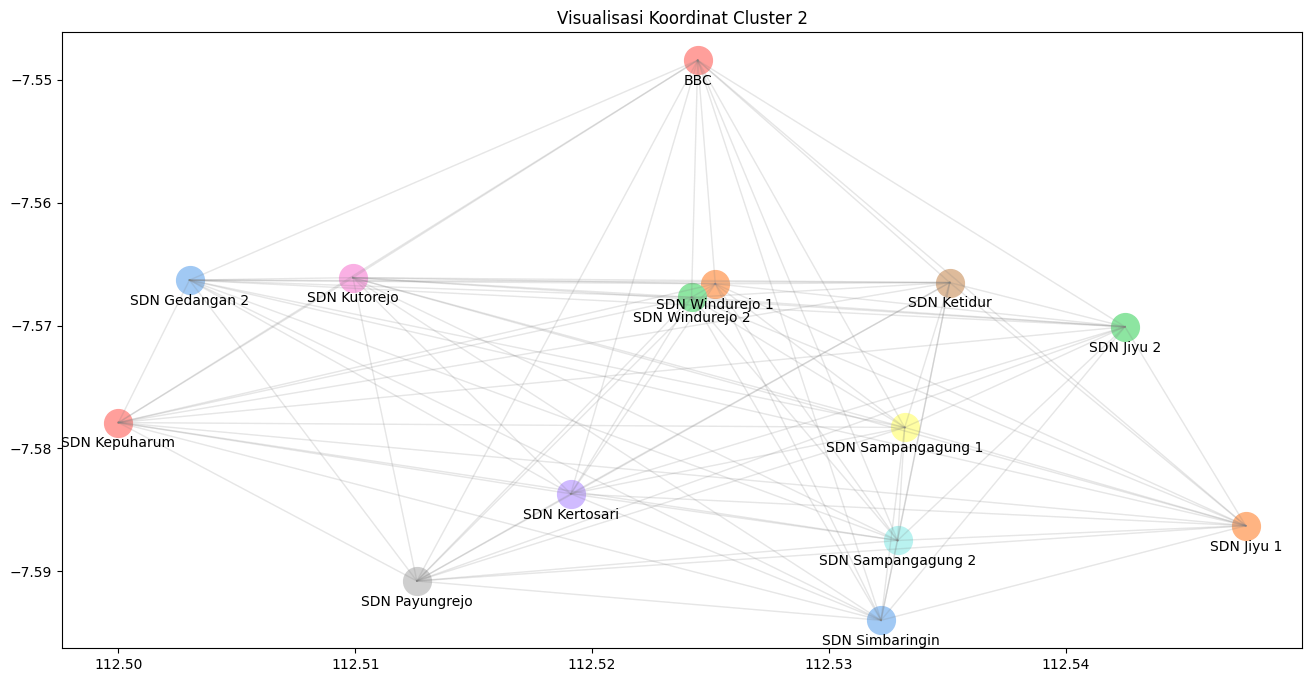

In [113]:
# Pastel Pallete
colors = sns.color_palette("pastel", len(cities_names))

fig, ax = plt.subplots()

ax.grid(False)  # Grid

for i, (city, (city_x, city_y)) in enumerate(city_coords.items()):
    color = colors[i]
    #icon = city_icons[city]
    ax.scatter(city_x, city_y, c=[color], s=400, zorder=1)
   # ax.annotate(icon, (city_x, city_y), fontsize=30, ha='center', va='center', zorder=3)
    ax.annotate(city, (city_x, city_y), fontsize=10, ha='center', va='bottom', xytext=(0, -20),
                textcoords='offset points')

    # Connect cities with opaque lines
    for j, (other_city, (other_x, other_y)) in enumerate(city_coords.items()):
        if i != j:
            ax.plot([city_x, other_x], [city_y, other_y], color='gray', linestyle='-', linewidth=1, alpha=0.1)

fig.set_size_inches(16, 8)
plt.title('Visualisasi Koordinat Cluster 2')
plt.show()

## Population Function (Random Initialization)

In [114]:
def initial_population(cities_names, n_population):

    cities_list = list(cities_names)
    cities_list.remove('BBC')  # Remove 'BBC' to place it at the start of each permutation
    population_perms = []

    for _ in range(n_population):
        perm = ['BBC'] + list(np.random.permutation(cities_list))  # Add 'BBC' at the start
        population_perms.append(perm)

    return population_perms

## Distance between two school

In [115]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance

In [116]:
def dist_two_cities(city1, city2):
    # Get coordinates of the two cities
    lat1, lon1 = city_coords[city1]
    lat2, lon2 = city_coords[city2]

    # Calculate the distance between the two cities
    distance = haversine_distance(lat1, lon1, lat2, lon2)
    return distance


In [117]:
# Create a matrix to store distances
distance_matrix = [[0 for _ in range(len(x))] for _ in range(len(x))]

# Calculate distances between each pair of coordinates
for i in range(len(x)):
    for j in range(len(x)):
        lat1, lon1 = city_coords[cities_names[i]]
        lat2, lon2 = city_coords[cities_names[j]]
        distance_matrix[i][j] = haversine_distance(lat1, lon1, lat2, lon2)

# Convert distances in the matrix to kilometers
for i in range(len(x)):
    for j in range(len(x)):
        distance_matrix[i][j] = round(distance_matrix[i][j], 2)  # Round to 2 decimal places

# Print the distance matrix
for i in range(len(x)):
    for j in range(len(x)):
        print(f"Distance from {cities_names[i]} to {cities_names[j]}:", distance_matrix[i][j], "km")

Distance from SDN Gedangan 2 to SDN Gedangan 2: 0.0 km
Distance from SDN Gedangan 2 to SDN Jiyu 1: 5.03 km
Distance from SDN Gedangan 2 to SDN Jiyu 2: 4.4 km
Distance from SDN Gedangan 2 to SDN Kepuharum: 0.6 km
Distance from SDN Gedangan 2 to SDN Kertosari: 1.94 km
Distance from SDN Gedangan 2 to SDN Ketidur: 3.57 km
Distance from SDN Gedangan 2 to SDN Kutorejo: 0.77 km
Distance from SDN Gedangan 2 to SDN Payungrejo: 1.49 km
Distance from SDN Gedangan 2 to SDN Sampangagung 1: 3.4 km
Distance from SDN Gedangan 2 to SDN Sampangagung 2: 3.45 km
Distance from SDN Gedangan 2 to SDN Simbaringin: 3.45 km
Distance from SDN Gedangan 2 to SDN Windurejo 1: 2.47 km
Distance from SDN Gedangan 2 to SDN Windurejo 2: 2.36 km
Distance from SDN Gedangan 2 to BBC: 2.5 km
Distance from SDN Jiyu 1 to SDN Gedangan 2: 5.03 km
Distance from SDN Jiyu 1 to SDN Jiyu 1: 0.0 km
Distance from SDN Jiyu 1 to SDN Jiyu 2: 0.89 km
Distance from SDN Jiyu 1 to SDN Kepuharum: 5.3 km
Distance from SDN Jiyu 1 to SDN Kertosa

## Total distance traveled by individual

In [118]:
def total_dist_individual(individual):

    """
    Calculating the total distance traveled by individual,
    one individual means one possible solution (1 permutation)
    Input:
    1- Individual list of cities
    Output:
    Total distance traveled
    """

    total_dist = 0
    for i in range(0, len(individual)):
        if(i == len(individual) - 1):
            total_dist += dist_two_cities(individual[i], individual[0])
        else:
            total_dist += dist_two_cities(individual[i], individual[i+1])
    return total_dist

## Fitness probability function

In [119]:
def fitness_prob(population):
    """
    Calculating the fitness probability
    Input:
    1- Population
    Output:
    Population fitness probability
    """
    total_dist_all_individuals = []
    for i in range(0, len(population)):
        total_dist_all_individuals.append(total_dist_individual(population[i]))

    max_population_cost = max(total_dist_all_individuals)
    population_fitness = max_population_cost - total_dist_all_individuals
    population_fitness_sum = sum(population_fitness)
    population_fitness_probs = population_fitness / population_fitness_sum
    return population_fitness_probs

## Roulette wheel

In [120]:
def roulette_wheel(population, fitness_probs):
    """
    Implement selection strategy based on roulette wheel proportionate selection.
    Input:
    1- population
    2- fitness probabilities
    Output:
    selected individual
    """
    population_fitness_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1
    return population[selected_individual_index]

## Crossover

In [121]:
def crossover(parent_1, parent_2):
    """
    Implement mating strategy using simple crossover between 2 parents
    Input:
    1- parent 1
    2- parent 2
    Output:
    1- offspring 1
    2- offspring 2
    """
    n_cities_cut = len(cities_names) - 1
    cut = round(random.uniform(1, n_cities_cut))
    offspring_1 = []
    offspring_2 = []

    offspring_1 = parent_1[0:cut]
    offspring_1 += [city for city in parent_2 if city not in offspring_1]


    offspring_2 = parent_2[0:cut]
    offspring_2 += [city for city in parent_1 if city not in offspring_2]


    return offspring_1, offspring_2


## Mutation

In [122]:
def mutation(offspring):
    """
    Implement mutation strategy in a single offspring
    Input:
    1- offspring individual
    Output:
    1- mutated offspring individual
    """
    n_cities_cut = len(cities_names) - 1
    index_1 = round(random.uniform(0,n_cities_cut))
    index_2 = round(random.uniform(0,n_cities_cut))

    temp = offspring[index_1]
    offspring[index_1] = offspring[index_2]
    offspring[index_2] = temp
    return(offspring)


# Algorithm

In [123]:
def run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per):

    population = initial_population(cities_names, n_population)
    fitness_probs = fitness_prob(population)

    parents_list = []
    for i in range(0, int(crossover_per * n_population)):
        parents_list.append(roulette_wheel(population, fitness_probs))

    offspring_list = []
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offsrping = []
    for i in best_fitness_indices:
        best_mixed_offsrping.append(mixed_offspring[i])

    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)

        fitness_probs = fitness_prob(best_mixed_offsrping)
        parents_list = []
        for i in range(0, int(crossover_per * n_population)):
            parents_list.append(roulette_wheel(best_mixed_offsrping, fitness_probs))

        offspring_list = []
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)

        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offsrping = []
        for i in best_fitness_indices:
            best_mixed_offsrping.append(mixed_offspring[i])

        old_population_indices = [random.randint(0, (n_population - 1)) for j in range(int(0.2*n_population))]
        for i in old_population_indices:
#             print(i)
            best_mixed_offsrping.append(population[i])

        random.shuffle(best_mixed_offsrping)

    return best_mixed_offsrping

### Optimum Solution Visualization

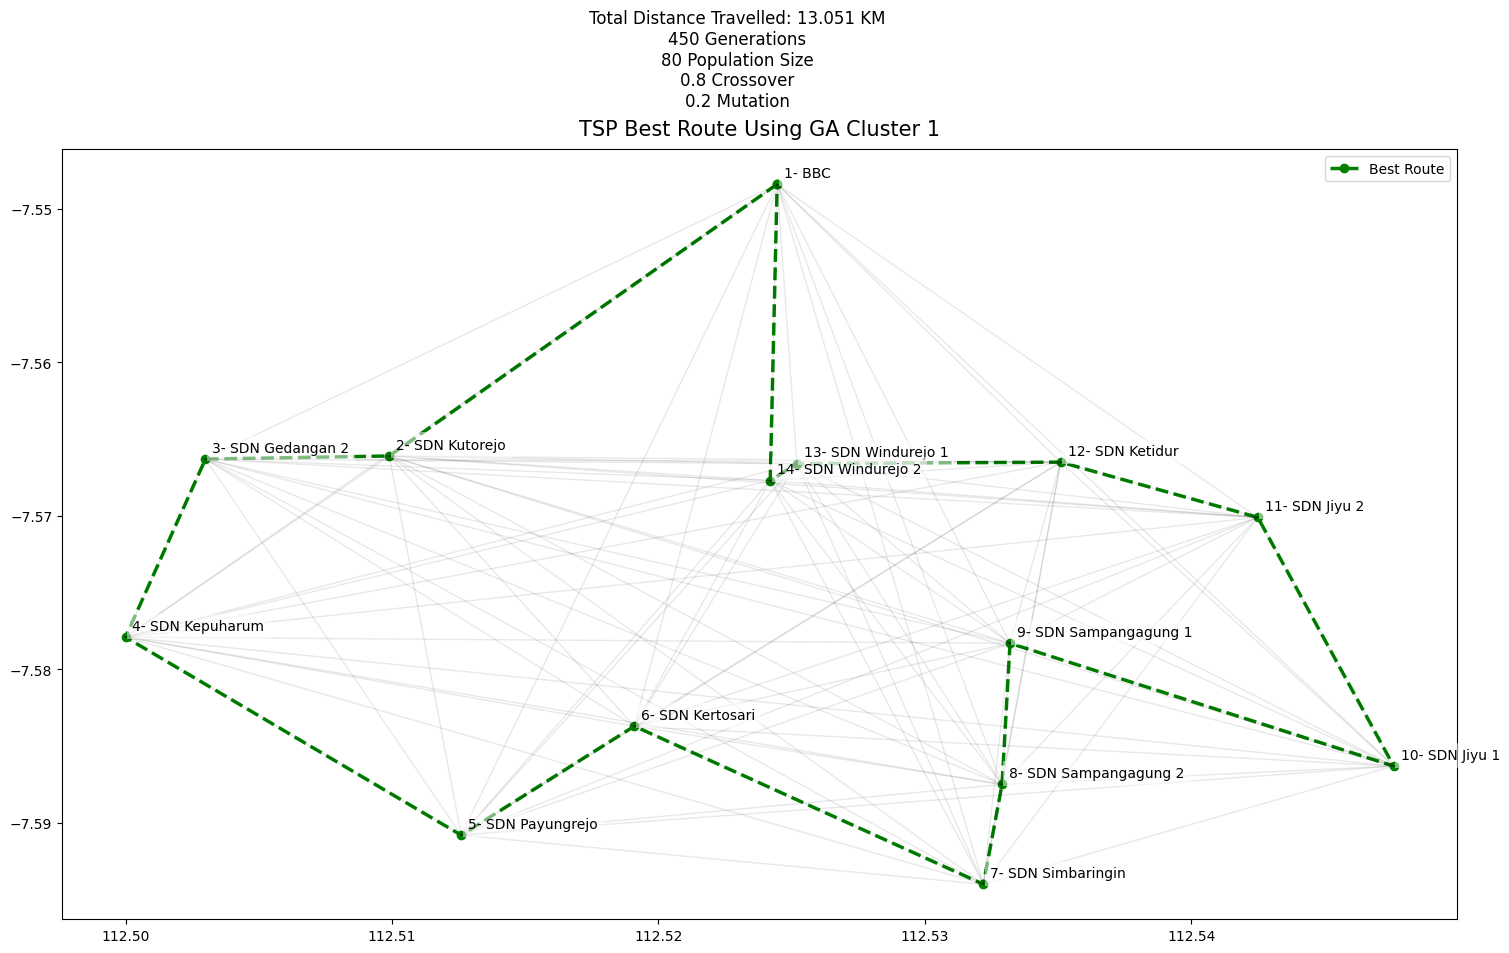

In [124]:
best_mixed_offsrping = run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per)

total_dist_all_individuals = []
for i in range(0, n_population):
    total_dist_all_individuals.append(total_dist_individual(best_mixed_offsrping[i]))

index_minimum = np.argmin(total_dist_all_individuals)

minimum_distance = min(total_dist_all_individuals)
minimum_distance

# shortest_path = offspring_list[index_minimum]
shortest_path = best_mixed_offsrping[index_minimum]

# Ensure "BBC" is the starting point
if shortest_path[0] != 'BBC':
    bbc_index = shortest_path.index('BBC')
    shortest_path = shortest_path[bbc_index:] + shortest_path[:bbc_index]

x_shortest = []
y_shortest = []
for city in shortest_path:
    x_value, y_value = city_coords[city]
    x_shortest.append(x_value)
    y_shortest.append(y_value)

x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label="TSP Best Route Using GA Cluster 1",
          fontsize=15,
          color="k",
          pad=10)  # Adjust the pad value as needed

str_params = f'\n{n_generations} Generations\n{n_population} Population Size\n{crossover_per} Crossover\n{mutation_per} Mutation'
plt.suptitle("Total Distance Travelled: " +
             str(round(minimum_distance, 3)) + " KM" +
             str_params, fontsize=12, y=1.02)  # Adjust the y value as needed

# Adjusting the position of the annotations to avoid overlapping
for i, txt in enumerate(shortest_path):
    ax.annotate(f"{i + 1}- {txt}",
                (x_shortest[i], y_shortest[i]),
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'),
                xytext=(5, 5),
                textcoords='offset points')

fig.set_size_inches(18, 10)
plt.savefig('solution.png')
plt.show()


# Shortest Path

In [125]:
minimum_distance


13.051319009276083

In [126]:
# shortest_path = offspring_list[index_minimum]
shortest_path

['BBC',
 'SDN Kutorejo',
 'SDN Gedangan 2',
 'SDN Kepuharum',
 'SDN Payungrejo',
 'SDN Kertosari',
 'SDN Simbaringin',
 'SDN Sampangagung 2',
 'SDN Sampangagung 1',
 'SDN Jiyu 1',
 'SDN Jiyu 2',
 'SDN Ketidur',
 'SDN Windurejo 1',
 'SDN Windurejo 2']